In [10]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## Softmax

In [11]:
num_samples=10
num_labels=5
my_vects=np.random.rand(num_samples,num_labels)
my_vects

array([[ 0.87251167,  0.68186188,  0.7363917 ,  0.55668487,  0.60709434],
       [ 0.58819238,  0.62858177,  0.04055683,  0.58696263,  0.25855982],
       [ 0.45162495,  0.63681469,  0.6347046 ,  0.80376401,  0.08177322],
       [ 0.83676107,  0.82325695,  0.85593948,  0.94018235,  0.12444464],
       [ 0.29448635,  0.13893163,  0.32015519,  0.72989682,  0.866327  ],
       [ 0.55942122,  0.84935524,  0.98127658,  0.81593458,  0.05322129],
       [ 0.98381664,  0.01741655,  0.97924172,  0.83734122,  0.24950466],
       [ 0.52777586,  0.47265182,  0.28337513,  0.44145787,  0.06429729],
       [ 0.68891905,  0.97713141,  0.00433557,  0.74842248,  0.8997414 ],
       [ 0.77630558,  0.06886562,  0.22465628,  0.4263181 ,  0.1156535 ]])

In [12]:
my_preds=np.exp(my_vects)/np.exp(my_vects).sum(axis=1,keepdims=1)
my_preds

array([[ 0.23836587,  0.19699079,  0.20803094,  0.17381299,  0.18279941],
       [ 0.23054805,  0.24005035,  0.13332953,  0.2302647 ,  0.16580738],
       [ 0.18124808,  0.21812241,  0.21766264,  0.25775403,  0.12521283],
       [ 0.21713568,  0.21422317,  0.22134019,  0.24079446,  0.1065065 ],
       [ 0.16131469,  0.13807573,  0.16550905,  0.24932756,  0.28577297],
       [ 0.17372195,  0.23215147,  0.26488913,  0.22452103,  0.10471643],
       [ 0.26885564,  0.10228617,  0.26762846,  0.23222325,  0.12900648],
       [ 0.23386695,  0.22132414,  0.18315845,  0.21452674,  0.14712371],
       [ 0.19476688,  0.25982692,  0.09822098,  0.20670792,  0.2404773 ],
       [ 0.30394076,  0.14981375,  0.17506958,  0.21418612,  0.15698979]])

In [13]:
my_labs=np.argmax(my_preds,axis=1)
my_labs

array([0, 1, 3, 3, 4, 2, 0, 0, 1, 0])

In [14]:
def softmax(v):
    expv=np.exp(v)
    pred=expv/expv.sum(axis=1,keepdims=True)
    return np.argmax(pred,axis=1),pred
softmax(my_vects)

(array([0, 1, 3, 3, 4, 2, 0, 0, 1, 0]),
 array([[ 0.23836587,  0.19699079,  0.20803094,  0.17381299,  0.18279941],
        [ 0.23054805,  0.24005035,  0.13332953,  0.2302647 ,  0.16580738],
        [ 0.18124808,  0.21812241,  0.21766264,  0.25775403,  0.12521283],
        [ 0.21713568,  0.21422317,  0.22134019,  0.24079446,  0.1065065 ],
        [ 0.16131469,  0.13807573,  0.16550905,  0.24932756,  0.28577297],
        [ 0.17372195,  0.23215147,  0.26488913,  0.22452103,  0.10471643],
        [ 0.26885564,  0.10228617,  0.26762846,  0.23222325,  0.12900648],
        [ 0.23386695,  0.22132414,  0.18315845,  0.21452674,  0.14712371],
        [ 0.19476688,  0.25982692,  0.09822098,  0.20670792,  0.2404773 ],
        [ 0.30394076,  0.14981375,  0.17506958,  0.21418612,  0.15698979]]))

## Feedforward

In [15]:
num_per_class=500
num_classes=3
X_lst=[]
centers=[[ 0,-2],
         [ 2, 2],
         [-2, 2]]
for c in range(num_classes):
    X_lst.append(np.random.randn(num_per_class,2) + np.array(centers[c]))
X=np.concatenate(X_lst,axis=0)
Y=np.array([0]*num_per_class+[1]*num_per_class+[2]*num_per_class)

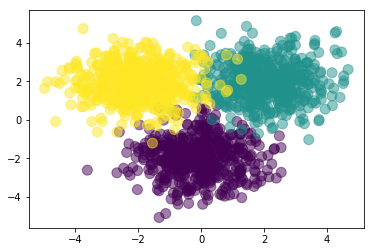

In [16]:
plt.scatter(X[:,0],X[:,1],c=Y,s=100,alpha=0.5)
plt.show()

In [17]:
num_nodes=[2,3,num_classes]

In [18]:
W=[]
b=[]
for i in range(len(num_nodes)-1):
    W.append(np.random.randn(num_nodes[i],num_nodes[i+1]))
    b.append(np.random.randn(num_nodes[i+1]))

In [19]:
def process(X,W,b):
    return X.dot(W)+b
def sigmoid(v):
    return 1/(1+np.exp(-v))
def softmax(v):
    expv=np.exp(v)
    if v.shape[0]>1:
        return expv/expv.sum(axis=1,keepdims=True)
    else:
        return expv/expv.sum(axis=1)
def forward(X,W,b,func=sigmoid,softmax_output=True):
    v=X
    for l in range(len(W)-1):
        v=func(process(v,W[l],b[l]))
    if softmax_output:
        return softmax(process(v,W[-1],b[-1]))
    else:
        return process(v,W[-1],b[-1])
def classification_rate(Y,P):
    tot=Y.shape[0]
    return 1.0*sum([Y[i]==P[i] for i in range(tot)])/tot

In [20]:
preds=forward(X,W,b)
preds[:5]

array([[ 0.0046487 ,  0.68754006,  0.30781124],
       [ 0.0047686 ,  0.59999639,  0.39523501],
       [ 0.00453152,  0.66422339,  0.33124509],
       [ 0.00916836,  0.49787617,  0.49295547],
       [ 0.00585281,  0.52201416,  0.47213303]])

In [21]:
pred_labels=np.argmax(preds,axis=1)
pred_labels[:5]

array([1, 1, 1, 1, 1])

In [22]:
classification_rate(Y,pred_labels)

0.3333333333333333